<a href="https://colab.research.google.com/github/Amalle26/estudo_machine_learning/blob/main/A_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando o pandas
import pandas as pd

In [ ]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [ ]:
# Retornando os dados
data = load_iris()

In [ ]:
# Pegando os dados do load iria
data.data # vai trazer os dados das colunas

In [ ]:
# Transformando em Dataframe
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names # pegando direto do dado o nome das colunas e colocando no dataframe
iris['target'] = data.target  # pegando uma coluna direto do dado e criando uma coluna no dataframe
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Selecionando apenas as colunas de pétela e esses targets
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']] # peganndo valores onde o target é 0 e 1. E
                                                                                            # pegando somende duas colunas:petal length (cm),petal width (cm) e target

In [ ]:
# Separando X e Y
X = iris1.drop('target', axis = 1) # a base completa excluindo a coluna targt
y = iris1.target  # somente a coluna target

In [ ]:
# Fazendo o train_test_split -> separar a base em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # de onde veio isso? Doc do modelo -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


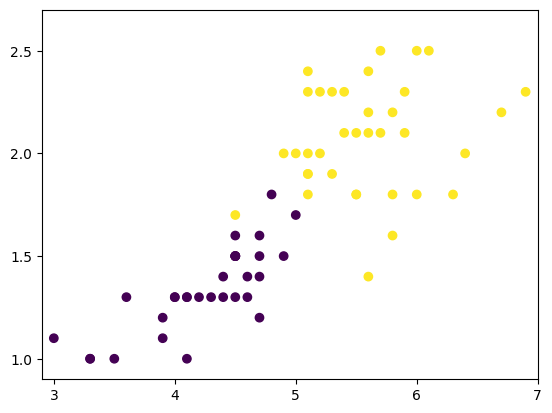

In [ ]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c = y_train)

ax.set(xlim = (2.9, 7), xticks =[3,4,5,6,7],
       ylim = (0.9, 2.7), yticks = [1,1.5,2,2.5])

plt.show()

In [ ]:
# Importando a árvore de decisão
from sklearn import tree

In [ ]:
# Criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train,y_train)

In [ ]:
# Verificando o score
clf.score(X_train,y_train)

1.0

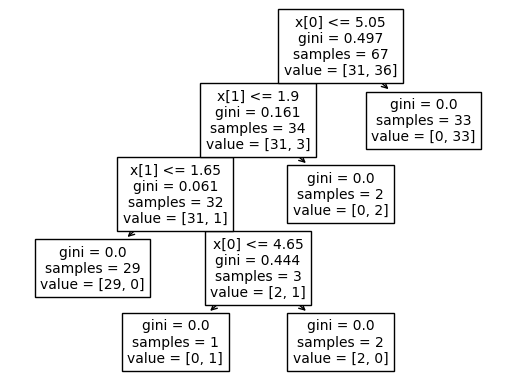

In [ ]:
# Visualizando essa árvore, regras criadas
fig, ax = plt.subplots()

tree.plot_tree(clf)

plt.show()

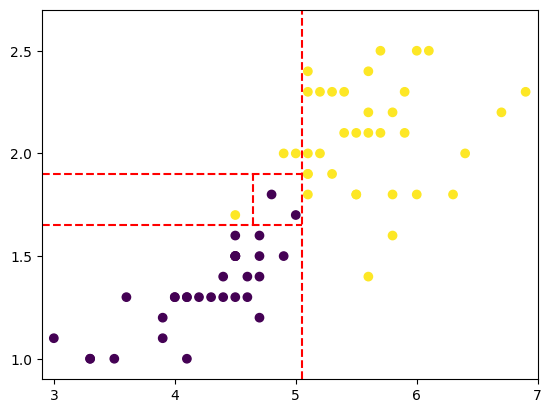

In [ ]:
# Adicionando essas regras ao gráfico
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c = y_train)

# ax.plot([1,5],[0.8,0.8],'--r')
ax.plot([5.05,5.05],[0.9,2.7], '--r')
ax.plot([2.9,5.05],[1.9,1.9], '--r')
ax.plot([2.9,5.05],[1.65,1.65], '--r')
ax.plot([4.65,4.65],[1.65,1.9], '--r')

ax.set(xlim = (2.9, 7), xticks =[3,4,5,6,7],
       ylim = (0.9, 2.7), yticks = [1,1.5,2,2.5])


plt.show()

In [ ]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1],
       [ 6,  8]])

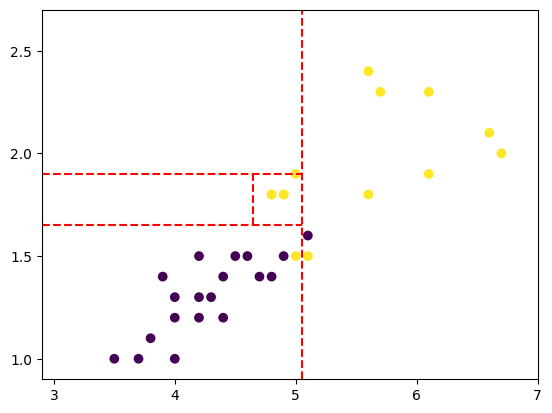

In [ ]:
# Visualizando esses dados de teste no gráfico acima
# fig, ax = plt.subplots()

# ax.scatter(X_test['petal length (cm)'],
#            X_test['petal width (cm)'],
#            c = y_test)
# ax.plot([1,5],[0.8,0.8],'--r')

# plt.show()
# --------------------------------------------------------------------------
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'],
           X_test['petal width (cm)'],
           c = y_test) # pred pra ver a predição do teste

# ax.plot([1,5],[0.8,0.8],'--r')
ax.plot([5.05,5.05],[0.9,2.7], '--r')
ax.plot([2.9,5.05],[1.9,1.9], '--r')
ax.plot([2.9,5.05],[1.65,1.65], '--r')
ax.plot([4.65,4.65],[1.65,1.9], '--r')

ax.set(xlim = (2.9, 7), xticks =[3,4,5,6,7],
       ylim = (0.9, 2.7), yticks = [1,1.5,2,2.5])


plt.show()